In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
vac = pd.read_csv('C:\Programming\Django\Vacancies.csv')

C:\Users\vadla\AppData\Local\Temp\ipykernel_15604\2556406632.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  vac = pd.read_csv('C:\Programming\Django\Vacancies.csv')


In [3]:
rates = pd.read_csv('C:\Programming\Django\Rub.csv')

In [4]:
vac.iloc[0:10, 0:7]

,name,key_skills,salary_from,salary_to,salary_currency,area_name,published_at
0,SAP R/3 functional consultant,NaN,NaN,NaN,NaN,Москва,2003-01-24T21:30:49+0300
1,Broadcast encryption engineer,NaN,NaN,2000.0,USD,Южная Корея,2003-01-31T18:24:11+0300
2,Embedded OS engineering manager,NaN,NaN,2000.0,USD,Москва,2003-01-31T18:25:43+0300
3,Coordinator on Intellectual Property Projects,NaN,NaN,NaN,NaN,Москва,2003-02-12T10:40:50+0300
4,Outsourcing Projects Coordinator,NaN,NaN,NaN,NaN,Москва,2003-02-14T16:31:06+0300
5,Software engineer Project Leader,NaN,NaN,NaN,NaN,Москва,2003-03-11T14:47:06+0300
6,Localization Project Coordinator,NaN,NaN,NaN,NaN,Москва,2003-03-19T14:22:04+0300
7,Software engineer (Project Leader ),NaN,NaN,NaN,NaN,Москва,2003-03-19T15:25:12+0300
8,Software engineer (Project Leader ),NaN,NaN,NaN,NaN,Москва,2003-03-19T15:26:37+0300
9,Software engineer (Project Leader),NaN,NaN,NaN,NaN,Москва,2003-03-19T15:27:50+0300


In [5]:
vac['year'] = vac['published_at'].astype(str).str.slice(0, 4)
vac['month'] = vac['published_at'].astype(str).str.slice(5, 7)


In [6]:
vac = vac[vac['key_skills'].str.contains('c++|с++', na=False)]

In [7]:
average_salary_by_year = vac.groupby('year')['salary_to'].mean()

In [8]:
rates['year'] = rates['date'].str.slice(6, 10)
rates['month'] = rates['date'].str.slice(3, 5)

In [9]:
rates['price'] = rates['price'].str.replace(',', '.').astype(float)

In [10]:
# Преобразование зарплаты в рубли
def convert_salary(row):
    matching_rates = rates[(rates['year'] == row['year']) & (rates['month'] == row['month'])]
    if matching_rates.empty:
        return None
    else:
        return row['salary_to'] * matching_rates['price'].values[0]

vac['salary_to_rub'] = vac.apply(lambda row: convert_salary(row) if row['salary_currency'] == 'USD' else row['salary_to'], axis=1)


In [11]:
vac = vac[vac['salary_to_rub'] <= 10000000]

In [12]:
average_salary_by_year = vac.groupby('year')['salary_to_rub'].mean()

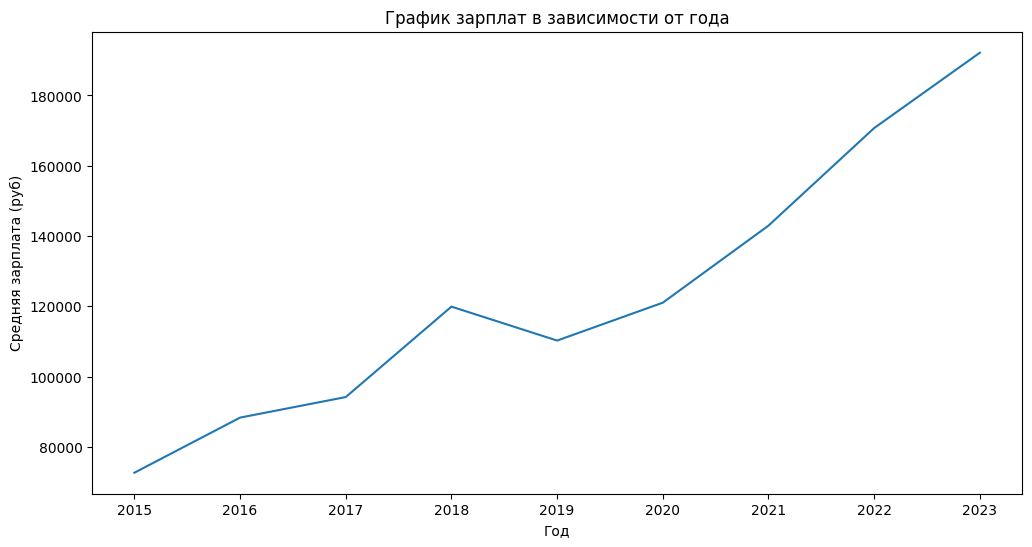

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(average_salary_by_year.index, average_salary_by_year.values)
plt.xlabel('Год')
plt.ylabel('Средняя зарплата (руб)')
plt.title('График зарплат в зависимости от года')
plt.show()